In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('../data/train/train-characters.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In [4]:
model = Sequential()
model.add(LSTM(units=64, return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

122/122 [==============================] - ETA: 0s - loss: 2.6087 - accuracy: 0.3047

2023-03-14 21:14:05.838501: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20280000 exceeds 10% of free system memory.
2023-03-14 21:14:06.956278: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-14 21:14:06.959972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-14 21:14:06.966264: I tensorflow/core/common_runtime/executor.cc:1197] [/devi

122/122 [==============================] - 40s 256ms/step - loss: 2.6087 - accuracy: 0.3047 - val_loss: 1.9814 - val_accuracy: 0.4915
Epoch 2/20
122/122 [==============================] - 30s 246ms/step - loss: 1.6123 - accuracy: 0.5703 - val_loss: 1.3406 - val_accuracy: 0.6408
Epoch 3/20
122/122 [==============================] - 30s 245ms/step - loss: 1.1487 - accuracy: 0.6939 - val_loss: 1.0381 - val_accuracy: 0.7011
Epoch 4/20
122/122 [==============================] - 28s 232ms/step - loss: 0.8995 - accuracy: 0.7405 - val_loss: 0.8444 - val_accuracy: 0.7330
Epoch 5/20
122/122 [==============================] - 27s 221ms/step - loss: 0.7425 - accuracy: 0.7758 - val_loss: 0.7091 - val_accuracy: 0.7731
Epoch 6/20
122/122 [==============================] - 25s 207ms/step - loss: 0.6576 - accuracy: 0.7979 - val_loss: 0.6630 - val_accuracy: 0.7855
Epoch 7/20
122/122 [==============================] - 24s 195ms/step - loss: 0.5964 - accuracy: 0.8096 - val_loss: 0.5997 - val_accuracy: 0.8

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150, 64)           19456     
                                                                 
 dense (Dense)               (None, 150, 26)           1690      
                                                                 
Total params: 21,146
Trainable params: 21,146
Non-trainable params: 0
_________________________________________________________________


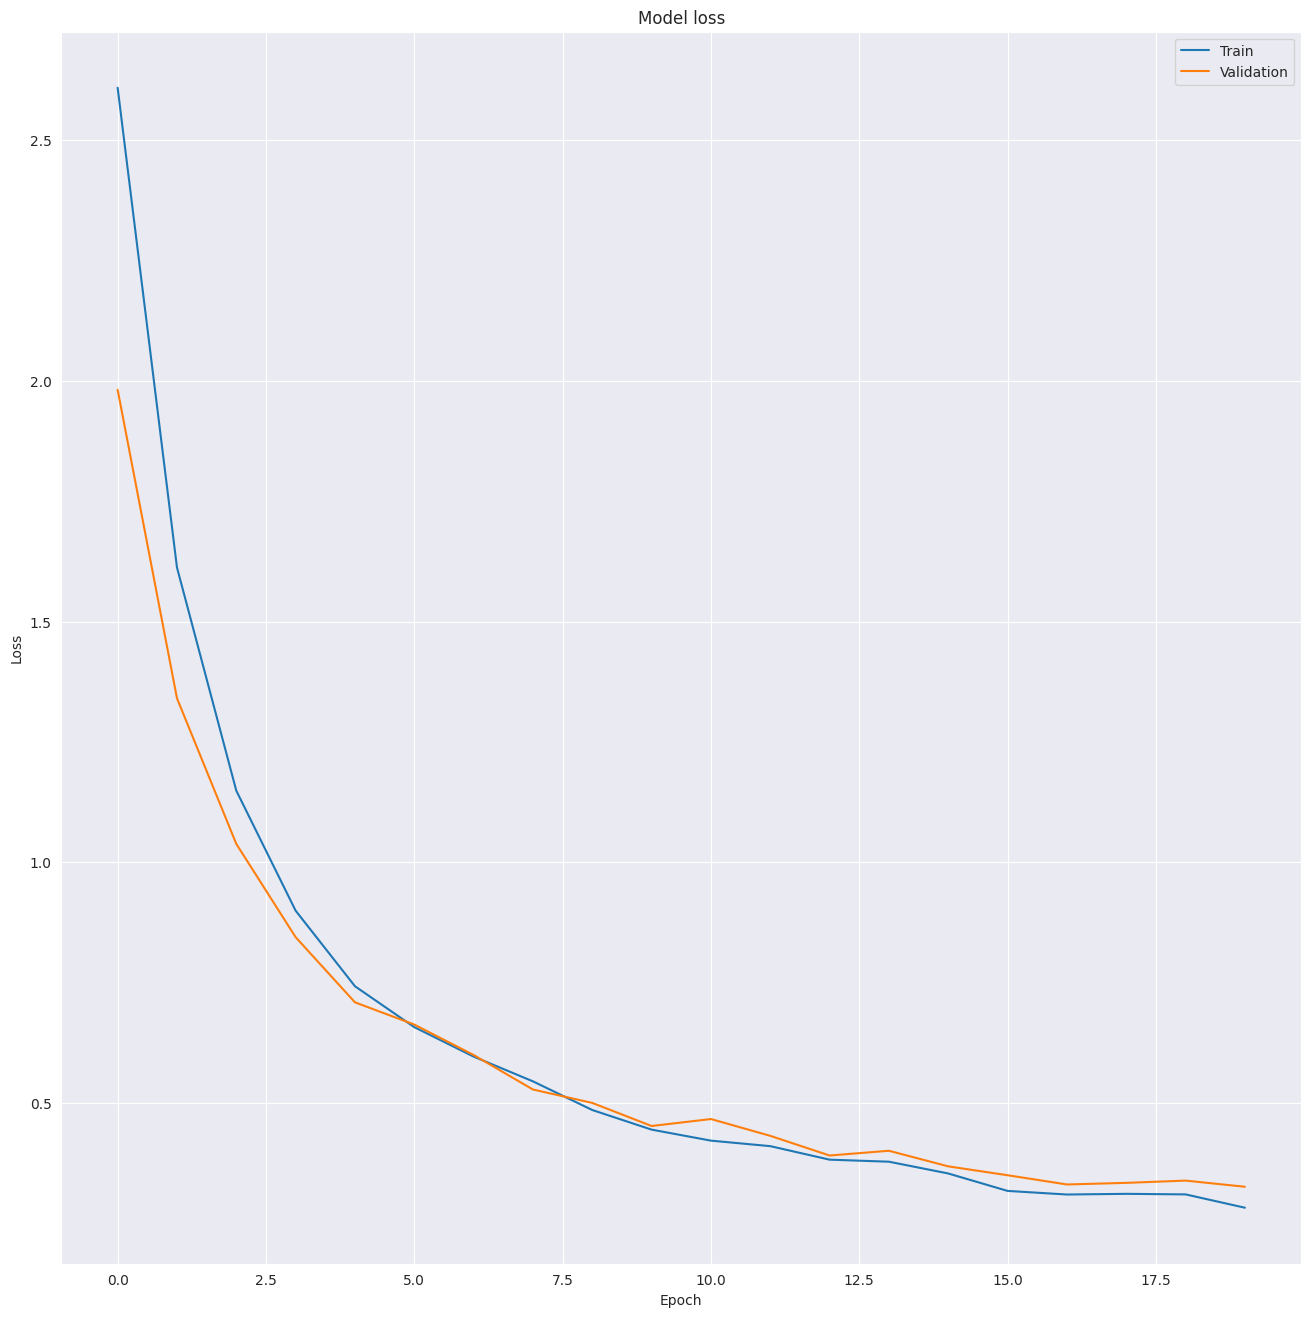

In [6]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

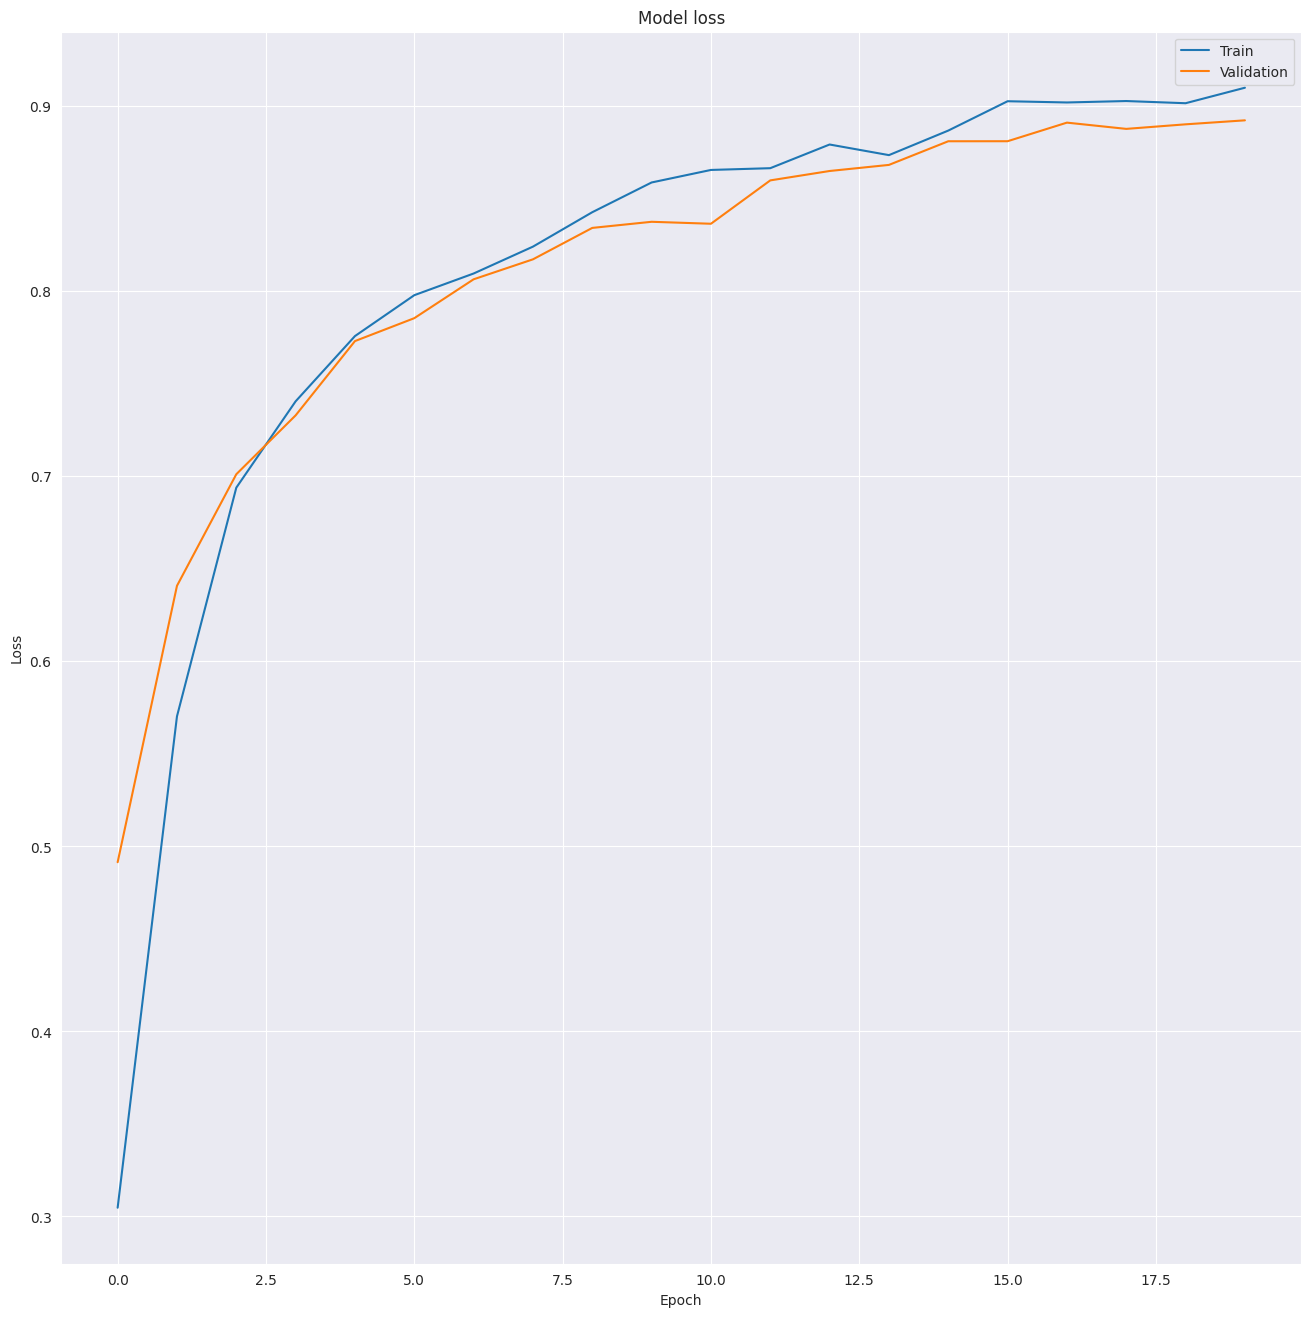

In [7]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [8]:
model.save('../models/characters.h5')